!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import product #combinations_with_replacement
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 500

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
ws = 50
world_size_x = ws
world_size_y = ws

##TODo if world_size_x != world_size_y fit then limit coord_full_list 

coord_full_list = np.array(list(product(range(ws), repeat=2)))
ind = np.random.choice(len(coord_full_list), nr_individuals, replace=False)
pos = coord_full_list[ind]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

In [3]:
rr = copy.copy(result)
rr

{0: {'out': {'out3': 0.001, 'out1': 0.736},
  'brain': {'in0out3': ['in0', 'out3', -3.794658934839005],
   'mid2out1': ['mid2', 'out1', -3.0002746833511367],
   'in1out1': ['in1', 'out1', 2.8767282160842362],
   'in0out1': ['in0', 'out1', -2.363375553181749],
   'mid1out0': ['mid1', 'out0', 1.8087593468640317],
   'mid0mid0': ['mid0', 'mid0', -3.5789409430795054],
   'in0mid0': ['in0', 'mid0', -0.1154890889668854]},
  'in': ['in1', 'in0'],
  'position': [[4, 48]]},
 2: {'out': {'out2': 0.998, 'out3': 0.88, 'out4': 0.003, 'out0': 0.996},
  'brain': {'in0out2': ['in0', 'out2', 3.016999847398138],
   'mid2mid2': ['mid2', 'mid2', 2.3294368991301693],
   'mid2out3': ['mid2', 'out3', 1.7583396917442393],
   'in1mid0': ['in1', 'mid0', 3.2756905234243856],
   'in0out4': ['in0', 'out4', -1.801922783457958],
   'mid2out0': ['mid2', 'out0', 3.1243094765756143],
   'in0out0': ['in0', 'out0', 1.761025484510911],
   'in1out4': ['in1', 'out4', -1.1917594994658935]},
  'in': ['in1', 'in0'],
  'positio

In [5]:
nr_of_errors = 0

k = 50
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
#     if n>1:
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#     print(n)
#     print(last_pos_list)
#     print()

    prevent_overlap_movement(last_pos_list, result)

#     for key_1, val_1 in last_pos_list.items():
#         last_pos_list_copy = copy.copy(last_pos_list)
#         del last_pos_list_copy[key_1]
#         for key_2, val_2 in last_pos_list_copy.items():
#             if val_1 == val_2:
#                 print('1',key_1, val_1, key_2, val_2)
#                 print('2', result[key_2]['position'][-1], result[key_2]['position'][-2])
#                 if result[key_2]['position'][-1] != result[key_2]['position'][-2]:
#                     result[key_2]['position'][-1] = result[key_2]['position'][-2]
#                     print('success')
# #                 result[key_1]['position'][-1] = result[key_1]['position'][-2]
#                 print('3',result[key_2]['position'][-1])
#                 print()
#     else:
#         last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    n += 1
pbar.close()


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:15<00:00,  2.70s/it]


In [6]:
# a = {1:[], 2:[], 3:[], 4:[]}
# k = list(a.keys())
# print(a ,',' ,k)

In [7]:
# result

In [8]:
# position_list = list(map(sum, zip(*[[0, -1], [1, 0], [0, 0], [0, 1]])))
# print(position_list)
# position_list = make_smaller_(position_list)
# print(position_list, x,y)
# position_list = list(map(sum, zip(*[[x, y]] + [position_list])))
# print(position_list)

In [9]:
# result[key_1]['position'][-1]

In [10]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: '.'.join((str(x[0]),str(x[1]))))

print(Counter(df.iloc[-1,:]).most_common())

df

[('4.34', 1), ('40.50', 1), ('40.0', 1), ('20.0', 1), ('16.50', 1), ('50.26', 1), ('1.15', 1), ('3.50', 1), ('11.0', 1), ('4.33', 1), ('4.1', 1), ('13.0', 1), ('41.1', 1), ('50.22', 1), ('35.50', 1), ('14.26', 1), ('43.0', 1), ('3.3', 1), ('44.50', 1), ('40.2', 1), ('7.14', 1), ('32.4', 1), ('5.37', 1), ('1.32', 1), ('0.27', 1), ('47.36', 1), ('1.12', 1), ('12.26', 1), ('1.18', 1), ('7.0', 1), ('5.41', 1), ('50.50', 1), ('21.46', 1), ('0.5', 1), ('1.25', 1), ('1.36', 1), ('35.0', 1), ('1.9', 1), ('8.19', 1), ('50.27', 1), ('6.0', 1), ('4.35', 1), ('12.0', 1), ('50.45', 1), ('15.30', 1), ('28.1', 1), ('42.38', 1), ('3.27', 1), ('17.50', 1), ('1.26', 1), ('1.48', 1), ('22.21', 1), ('0.25', 1), ('2.21', 1), ('40.37', 1), ('2.7', 1), ('0.3', 1), ('28.4', 1), ('0.38', 1), ('29.0', 1), ('11.1', 1), ('0.20', 1), ('3.34', 1), ('0.13', 1), ('26.7', 1), ('11.50', 1), ('1.49', 1), ('13.24', 1), ('9.0', 1), ('1.3', 1), ('0.34', 1), ('36.50', 1), ('18.0', 1), ('12.17', 1), ('18.25', 1), ('6.49', 1)

,0,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
0,4.48,38.41,40.3,27.6,17.35,43.9,3.22,20.38,13.3,4.43,...,4.24,30.21,11.17,35.34,30.4,8.23,29.4,47.1,6.41,1.46
1,4.48,38.42,40.2,26.5,17.35,43.9,2.21,19.39,13.2,4.43,...,4.24,29.20,11.17,34.33,30.4,8.23,29.4,47.0,7.41,1.46
2,4.47,38.43,40.2,25.4,17.35,43.10,2.20,18.40,12.1,4.43,...,3.24,28.19,11.17,34.32,29.4,8.23,28.5,47.0,8.41,2.47
3,4.47,38.43,40.2,24.3,17.35,44.11,1.20,17.41,11.0,4.43,...,3.24,27.18,11.17,34.31,28.4,8.24,29.5,47.0,9.41,3.48
4,4.47,38.44,40.1,23.2,17.35,44.12,1.19,16.42,11.0,4.43,...,2.24,26.17,11.17,34.30,27.4,8.24,29.6,47.0,10.41,3.48
5,4.47,38.45,40.1,22.1,17.36,45.13,1.19,15.43,11.0,4.42,...,1.24,26.17,11.17,34.29,27.4,8.24,29.6,47.0,11.41,4.49
6,4.47,38.46,40.1,21.1,17.36,45.14,1.19,14.43,11.0,4.42,...,0.24,26.17,11.17,34.29,27.4,8.24,28.6,47.0,12.41,5.50
7,4.46,38.47,40.1,20.0,17.36,46.15,1.19,13.44,11.0,4.41,...,0.24,26.17,11.17,34.28,26.4,8.25,28.6,47.0,13.41,6.50
8,4.45,38.48,40.0,20.0,17.37,46.16,1.19,12.44,11.0,4.41,...,0.24,26.17,11.17,34.27,25.4,8.26,27.7,47.0,13.41,7.50
9,4.44,38.49,40.0,20.0,17.38,46.17,1.19,11.44,11.0,4.41,...,0.24,26.17,11.17,34.27,24.4,8.26,27.7,47.0,14.41,8.50


In [11]:
# df.iloc[-1,:][df.iloc[-1,:]=='1.0']


In [12]:
# result[4]['position']

In [13]:
# result[4]['position']

In [14]:
# last_pos_list= [[tuple(result[obj]['position'][-1])] for obj in result]

In [15]:
# from itertools import chain
# Counter(chain(* l)).most_common()

generate dictionary of coords 

In [16]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


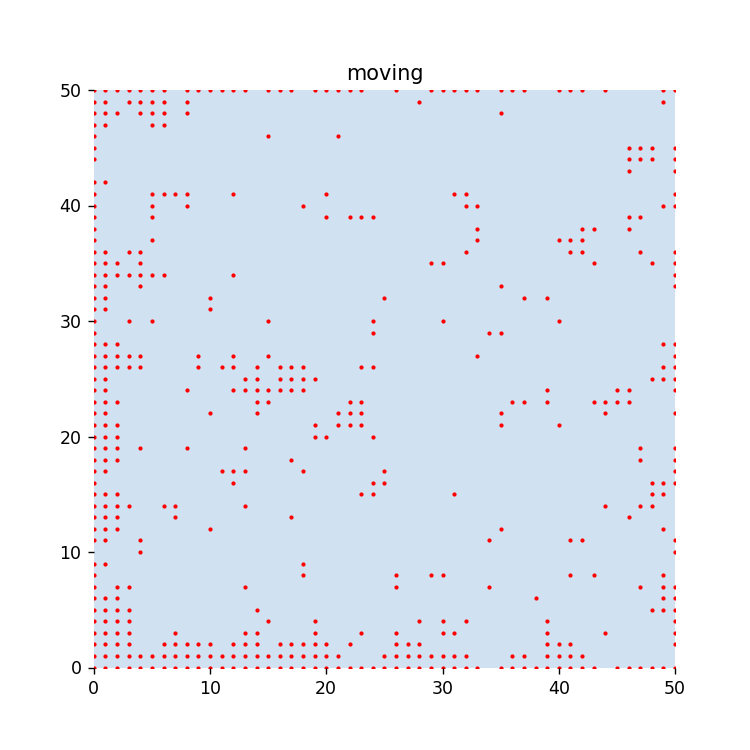

In [20]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [18]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary

'00011010100111000110001000000101'